- [X=df.drop('', axis=1)](X&y) define X and y 
- [from sklearn.model_selection import train_test_split](#split) 
<br>[X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)](#code)
- [from sklearn.linear_model import LinearRegression](#linear)
<br> [model = LinearRegression()](#model) keeping all the default parameters
<br> [model.fit(X_train, y_train)](#fit)
<br> [model.predict(X_test)](#predict)
- What is a hyperparameter?

---

What is the __relationship between each advertising channel__ (that is TV, radio, newspaper) and __sales__.

This is going to allow us to specifically see if one of these channels is better than the other? Maybe we don't want to actually invest that much into newspaper advertising because it doesn't actually increase sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Let's actually explore visually the relationship between each advertising channel and sales.

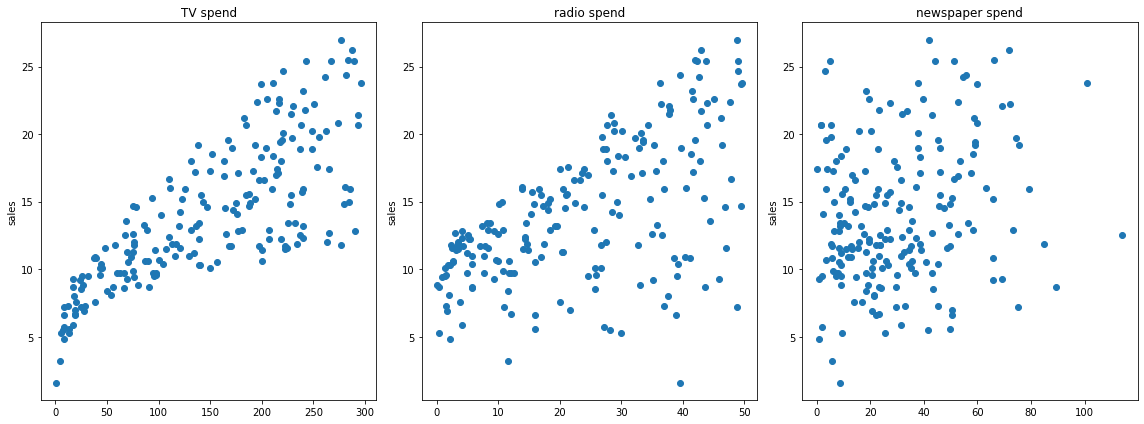

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('sales')
axes[0].set_title('TV spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_title('radio spend')
axes[1].set_ylabel('sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_title('newspaper spend')
axes[2].set_ylabel('sales')

plt.tight_layout()

In [5]:
axes

array([<AxesSubplot:title={'center':'TV spend'}, ylabel='sales'>,
       <AxesSubplot:title={'center':'radio spend'}, ylabel='sales'>,
       <AxesSubplot:title={'center':'newspaper spend'}, ylabel='sales'>],
      dtype=object)

And just visually, I can see that it looks like TV spend and radio spend do have some sort of positive correlation. As you increase TV advertising expenditure, your sales are more likely to go up. Same with radio spend.
<br>For something like newspaper, though, it's a little less clear if really increasing newspapers spend actually results in higher sales. What's nice about linear regression on multiple features is we will actually be able to see the beta coefficient for each of these features and then we can understand based off the beta coefficient, how likely, if you increase your newspaper expenditure, holding everything else fixed, you're actually going to increase your sales or not.

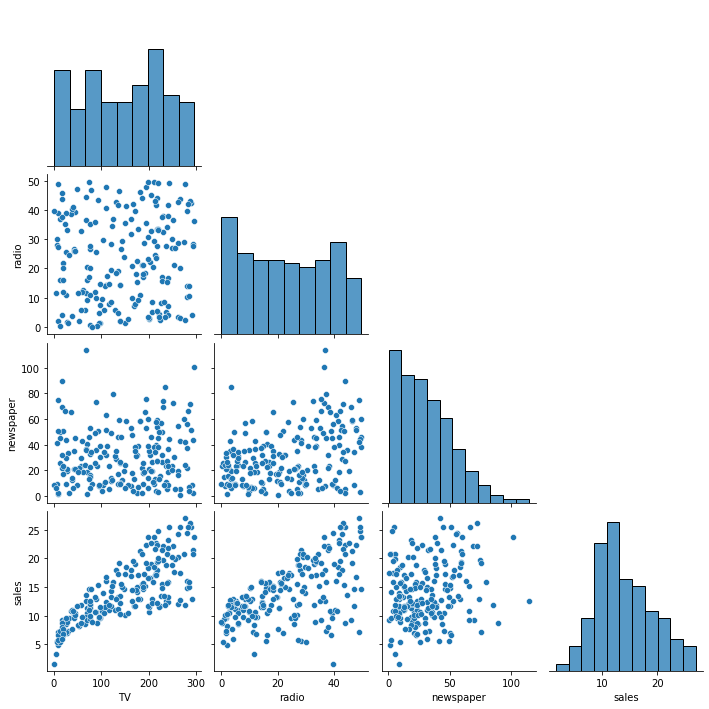

In [6]:
sns.pairplot(df, corner=True)

---

In [7]:
X = df.drop('sales', axis=1)

In [8]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y = df['sales']

Keep in mind, when we later on explore more complex iterations of algorithms, we may actually do some preprocessing to the data, things like standardizing or normalizing your data set. Right now, everything seems to be pretty much at the same order of magnitude, so we won't worry about that for now.

---

Recall, to fairly evaluate my model's performance, I don't want to evaluate it on the same data it was trained, so we'll separate out a training set and a test set.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

- The ___test_size___ parameter just asks you what percentage of the data should go to the test set.
- The ___random_state___ parameter
  - Keep in mind, that this actual number choice doesn't really matter. It's just arbitrary. What does matter is that you make sure it's __the same value__ if you intend __to use multiple algorithms__ and __compare their performance__. We want to make sure that if we're comparing one algorithm to the other, that they had __the exact same train|test split__ to make sure that one algorithm didn't get a very lucky split.
  - The other reason that we have a random_state here is because what sklearn is going to do when it calls train_test_split is it's actually going __to shuffle the arrays first__. Now more or less my data appears to be in no sort of sorted order. But for other data sets, it's not uncommon that when you read it, then it's actually already sorted for you. We want to make sure that we shuffle everything first and then grab the 70 percent and 30 percent. That way I don't have an accidentally ordered data set. Otherwise, that could be really dangerous as far as fairly evaluating and training your model.

In [12]:
print(len(df), len(X_train), len(X_test), sep=', ')

200, 140, 60


---

__Next step__ is to actually __create the model__. This is also known as __creating an estimator__ within Scikit-Learn.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# help(LinearRegression)

# call help() on that model to begin to explore its hyperparameters.

---

__Hyperparameters__ are parameters or constants within the model itself that __we can edit to try to adjust for better performance__. <br>(things in the model that you can edit to try to get better performance)

---

You'll notice that, in general, there's actually not too many parameters here for linear regression, which makes sense because from what we understand, a linear regression is just calculating those coefficients.

In [15]:
model = LinearRegression() # keeping all the default parameters

# now we have this instance of a linear regression model

The very first time you use any model, go ahead and just use the default parameters and just check its baseline performance and then come back and start dealing with the parameters or hyperparameters that you can begin to edit. 

__`.fit() method`__
<br>Now that I've created this model, it's waiting for data to be trained on. 

In [16]:
model.fit(X_train, y_train)

# this all happens in place of Scikit-learn

LinearRegression()

__`.predict() method`__

In [17]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

---